In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
#load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head() #by default it is 5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
x = diabetes.drop('Outcome',axis=1)
x
y = diabetes.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)
len(x_test)

154

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy {:.2f}%".format(accuracy*100))

Accuracy 75.32%


In [19]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\n Lassification report : \n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[87 14]
 [24 29]]

 Lassification report : 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       101
           1       0.67      0.55      0.60        53

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.75       154



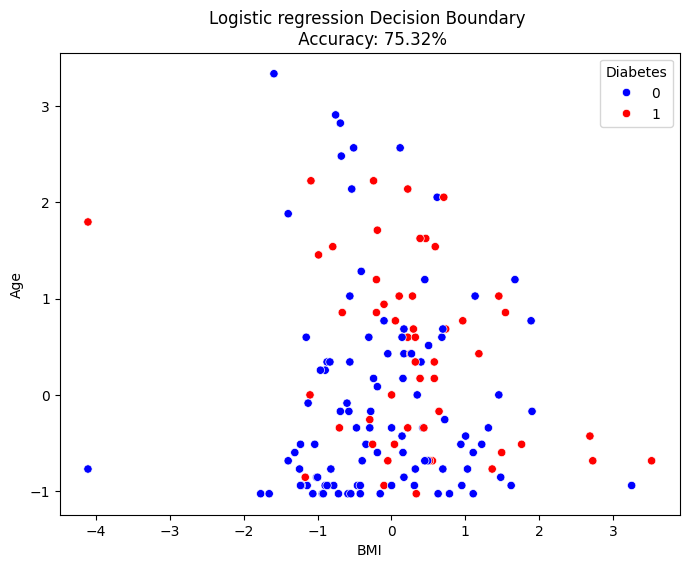

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_test[:,5],y=x_test[:,7],hue=y_test,palette={
    0: 'blue',
    1:'red'
},marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic regression Decision Boundary \n Accuracy: {:.2f}%".format(accuracy*100))
plt.legend(title="Diabetes",loc="upper right")
plt.show()